In [1]:
import pandas as pd

df = pd.read_csv('ecommerce_return_rate_analysis_with_names.csv')
print(df)

       Order_ID Customer_ID     Customer_Name Product_ID        Category  \
0     ORD100000   CUST19623       Sarah Jones   PROD5178          Beauty   
1     ORD100001   CUST12746       Jane Miller   PROD1259          Sports   
2     ORD100002   CUST16674     Michael Jones   PROD9572  Home & Kitchen   
3     ORD100003   CUST19149      Sarah Miller   PROD5756          Sports   
4     ORD100004   CUST18018    Chris Williams   PROD6309          Sports   
...         ...         ...               ...        ...             ...   
9995  ORD109995   CUST17703     Michael Jones   PROD9487        Clothing   
9996  ORD109996   CUST15026        Jane Jones   PROD3521        Clothing   
9997  ORD109997   CUST14855  Michael Martinez   PROD3209        Clothing   
9998  ORD109998   CUST19287     Michael Brown   PROD6649        Clothing   
9999  ORD109999   CUST15355      Laura Miller   PROD5030          Beauty   

     Geography  Order_Date Delivery_Date Return_Date  Returned   Price  \
0        Nort

In [2]:
df_clean = df.dropna(subset=['Returned', 'Category', 'Geography', 'Price', 'Customer_Rating'])
print(df)

       Order_ID Customer_ID     Customer_Name Product_ID        Category  \
0     ORD100000   CUST19623       Sarah Jones   PROD5178          Beauty   
1     ORD100001   CUST12746       Jane Miller   PROD1259          Sports   
2     ORD100002   CUST16674     Michael Jones   PROD9572  Home & Kitchen   
3     ORD100003   CUST19149      Sarah Miller   PROD5756          Sports   
4     ORD100004   CUST18018    Chris Williams   PROD6309          Sports   
...         ...         ...               ...        ...             ...   
9995  ORD109995   CUST17703     Michael Jones   PROD9487        Clothing   
9996  ORD109996   CUST15026        Jane Jones   PROD3521        Clothing   
9997  ORD109997   CUST14855  Michael Martinez   PROD3209        Clothing   
9998  ORD109998   CUST19287     Michael Brown   PROD6649        Clothing   
9999  ORD109999   CUST15355      Laura Miller   PROD5030          Beauty   

     Geography  Order_Date Delivery_Date Return_Date  Returned   Price  \
0        Nort

In [3]:
df_clean = df_clean.drop_duplicates()
print(df)

       Order_ID Customer_ID     Customer_Name Product_ID        Category  \
0     ORD100000   CUST19623       Sarah Jones   PROD5178          Beauty   
1     ORD100001   CUST12746       Jane Miller   PROD1259          Sports   
2     ORD100002   CUST16674     Michael Jones   PROD9572  Home & Kitchen   
3     ORD100003   CUST19149      Sarah Miller   PROD5756          Sports   
4     ORD100004   CUST18018    Chris Williams   PROD6309          Sports   
...         ...         ...               ...        ...             ...   
9995  ORD109995   CUST17703     Michael Jones   PROD9487        Clothing   
9996  ORD109996   CUST15026        Jane Jones   PROD3521        Clothing   
9997  ORD109997   CUST14855  Michael Martinez   PROD3209        Clothing   
9998  ORD109998   CUST19287     Michael Brown   PROD6649        Clothing   
9999  ORD109999   CUST15355      Laura Miller   PROD5030          Beauty   

     Geography  Order_Date Delivery_Date Return_Date  Returned   Price  \
0        Nort

In [4]:

category_returns = df_clean.groupby('Category')['Returned'].mean().reset_index()
category_returns.columns = ['Category', 'Return_Rate']
print(category_returns)


         Category  Return_Rate
0          Beauty     0.203947
1           Books     0.189499
2        Clothing     0.196809
3     Electronics     0.209009
4  Home & Kitchen     0.185846
5          Sports     0.216104


In [5]:
geo_returns = df_clean.groupby('Geography')['Returned'].mean().reset_index()
geo_returns.columns = ['Geography', 'Return_Rate']
print(geo_returns)

  Geography  Return_Rate
0   Central     0.202463
1      East     0.197307
2     North     0.202186
3     South     0.201172
4      West     0.198180


In [17]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('ecommerce_return_rate_analysis_with_names.csv')

# Step 1: Clean the data by removing rows with missing values in key columns
df_clean = df.dropna(subset=['Price', 'Category', 'Geography', 'Returned', 'Customer_Rating'])

# Step 2: Encode categorical variables
cat_cols = ['Category', 'Geography', 'Payment_Method', 'Customer_Gender']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# Check the first few rows of cleaned and encoded data
df_clean.head()


,Order_ID,Customer_ID,Customer_Name,Product_ID,Category,Geography,Order_Date,Delivery_Date,Return_Date,Returned,Price,Discount,Shipping_Cost,Payment_Method,Customer_Age,Customer_Gender,Customer_Rating
0,ORD100000,CUST19623,Sarah Jones,PROD5178,0,2,03-03-2023,25-11-2023,NaN,1,809.37,0.34,34.44,2,67,2,1.3
1,ORD100001,CUST12746,Jane Miller,PROD1259,5,3,15-06-2024,29-03-2023,NaN,0,659.09,0.37,23.67,3,33,0,2.4
2,ORD100002,CUST16674,Michael Jones,PROD9572,4,4,29-08-2023,30-05-2024,NaN,0,149.96,0.10,4.75,3,45,0,4.2
3,ORD100003,CUST19149,Sarah Miller,PROD5756,5,3,15-12-2024,15-06-2023,NaN,0,103.10,0.42,42.59,3,29,2,3.8
4,ORD100004,CUST18018,Chris Williams,PROD6309,5,1,14-02-2024,12-08-2023,NaN,1,351.58,0.47,5.41,0,25,0,4.5


In [22]:
df['Returned'].value_counts()


Returned
0    7997
1    2003
Name: count, dtype: int64

In [23]:
from sklearn.metrics import classification_report

# Print classification report with zero_division set to 1 (this avoids the warning)
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2429
           1       1.00      0.00      0.00       571

    accuracy                           0.81      3000
   macro avg       0.90      0.50      0.45      3000
weighted avg       0.85      0.81      0.72      3000



In [24]:
from sklearn.model_selection import StratifiedKFold

# Using Stratified KFold to handle class imbalance better during cross-validation
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1599
           1       1.00      0.00      0.00       401

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.44      2000
weighted avg       0.84      0.80      0.71      2000

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1599
           1       1.00      0.00      0.00       401

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.44      2000
weighted avg       0.84      0.80      0.71      2000

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1599
           1       1.00      0.00      0.00       401

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.44      2000
weighted avg       0.84      0.80      0.71      2000

              preci

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf, zero_division=1))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1600
           1       1.00      0.00      0.00       400

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.44      2000
weighted avg       0.84      0.80      0.71      2000



In [31]:
# Predict the probability of return for each product
df_clean['Return_Probability'] = model.predict_proba(X)[:, 1]

# Display the top rows with return probability
df_clean[['Product_ID', 'Category', 'Geography', 'Return_Probability']].head()


,Product_ID,Category,Geography,Return_Probability
0,PROD5178,0,2,0.196128
1,PROD1259,5,3,0.203506
2,PROD9572,4,4,0.213465
3,PROD5756,5,3,0.208493
4,PROD6309,5,1,0.204524


In [35]:
# Filter for high-risk products (probability > 0.7)
high_risk = df_clean[df_clean['Return_Probability'] > 0.7]

# Display high-risk products
high_risk[['Product_ID', 'Category', 'Geography', 'Return_Probability']].head()


,Product_ID,Category,Geography,Return_Probability


In [37]:
# Save the high-risk products to a CSV file
high_risk.to_csv('high_risk_products.csv', index=False)


In [39]:
# Group by Category and calculate mean return rate
category_return = df_clean.groupby('Category')['Returned'].mean().sort_values(ascending=False)


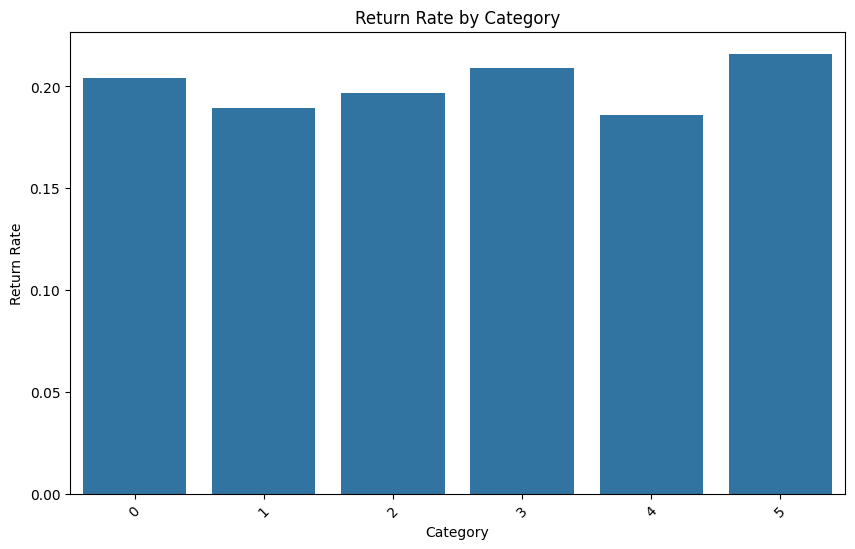

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize return rate by Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_return.index, y=category_return.values)
plt.title('Return Rate by Category')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.show()
